In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import time
import requests
from datetime import datetime, timedelta
from shapely.geometry import Point
from busSim import BusSim
from graph import Graph
from IPython.core.display import HTML
from matplotlib.animation import FuncAnimation

In [33]:
city = gpd.read_file("../data/plot/background/madison-shp")
lakes = gpd.read_file("../data/plot/background/water-shp")
street = gpd.read_file("../data/plot/background/street-shp")
stops = gpd.read_file("../data/plot/background/stops-shp")
def plot(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN, ax):
    
    busSim = BusSim(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)
    gdf = busSim.get_gdf(START_STOP)
    city.plot(color="lightgray", alpha=.2, figsize=(24, 24), zorder=2, ax=ax)
    lakes.plot(color="lightblue", ax=ax, zorder=1, alpha=0.8)
    street.plot(color="darkgray", alpha = .5, ax=ax, zorder=3)
    gdf.difference(lakes.unary_union).plot(color="#ffbfba", ax=ax)
    starting_pt = stops[stops.stop_id == START_STOP]
    starting_pt.plot(color='darkblue', ax=ax, marker='x', zorder=10)
    gdf["geometry"].centroid.plot(color="red", ax=ax, markersize=2)
    # s = gdf.geometry_centriod
    # df = pd.DataFrame(s)
    # gdf2 = gpd.GeoDataFrame(df, geometry = df.geometry_centriod)
    # gdf2.plot(color="red", ax=ax, markersize=2)
    # gdf['geometry_centriod'].plot(color="red", ax=ax, markersize=2)
    
    ax.set_axis_off() 

def get_area(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN):
             
    busSim = BusSim(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)
    gdf = busSim.get_gdf(START_STOP)
    return busSim.get_area(gdf)
    
    

In [19]:
DATA_PATH = "../data"
DAY = "monday"
START_STOP = 765
START_TIME = "06:00:00"
ELAPSE_TIME = "00:30:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 10

#plot(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)


In [4]:
get_area(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)

5229123.399650559

In [5]:
DATA_PATH = "../data"
DAY = "monday"
START_STOP = 765
START_TIME = "23:00:00"
ELAPSE_TIME = "00:30:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 10

# simulate(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)

In [6]:
DATA_PATH = "../data"
DAY = "monday"
START_STOP = 765
START_TIME = "23:00:00"
ELAPSE_TIME = "00:30:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 10

areas = []
starting = [] 
for i in range(24):
    if i < 10:
        START_TIME = '0' + str(i) + ":00:00"
    else:
        START_TIME = str(i) + ":00:00"
    try:
        area = get_area(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)
        areas.append(area)
        starting.append(START_TIME)
    except:
        print(START_TIME)
    
    # running the simulation for hr:30:00
    if i < 10:
        START_TIME = '0' + str(i) + ":30:00"
    else:
        START_TIME = str(i) + ":30:00"
    try:
        area = get_area(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)
        areas.append(area)
        starting.append(START_TIME)
    except:
        print(START_TIME)
        areas.append(0)
        starting.append(START_TIME)

02:30:00
03:00:00
03:30:00
04:00:00
04:30:00
05:00:00


In [7]:
df = pd.DataFrame({'Start_Time': starting, "Area_Covered": areas})
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format="%H:%M:%S")
df['Area_Covered_e6'] = df['Area_Covered'] / 10**6
df

,Start_Time,Area_Covered,Area_Covered_e6
0,1900-01-01 00:00:00,2.984424e+06,2.984424
1,1900-01-01 00:30:00,3.545863e+06,3.545863
2,1900-01-01 01:00:00,5.270331e+06,5.270331
3,1900-01-01 01:30:00,3.545863e+06,3.545863
4,1900-01-01 02:00:00,2.153479e+06,2.153479
5,1900-01-01 02:30:00,0.000000e+00,0.000000
6,1900-01-01 03:30:00,0.000000e+00,0.000000
7,1900-01-01 04:30:00,0.000000e+00,0.000000
8,1900-01-01 05:30:00,2.936207e+07,29.362070
9,1900-01-01 06:00:00,5.229123e+06,5.229123


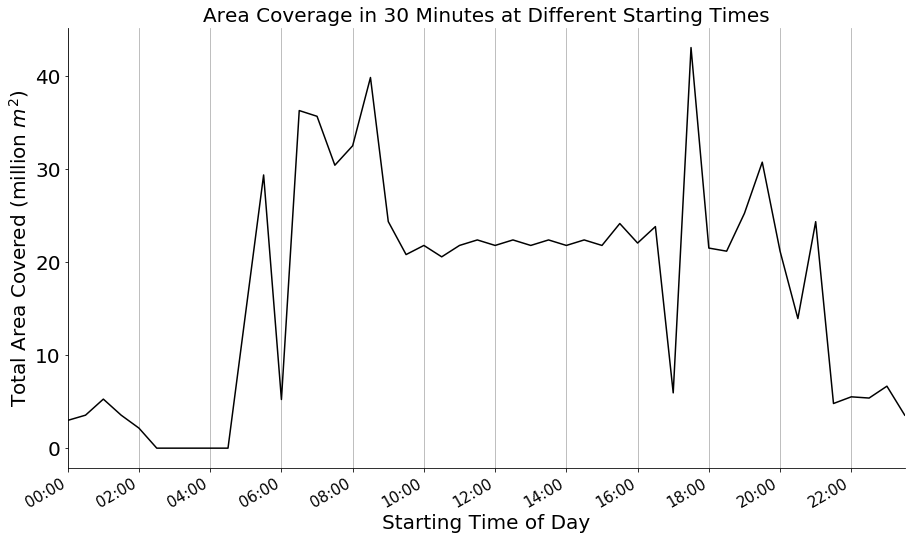

In [69]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(15,9))
df.plot.line(ax=ax, x='Start_Time', y='Area_Covered_e6', color='black', legend=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
hours = mdates.HourLocator(interval = 2)
h_fmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax.tick_params(axis='x', labelsize=15, rotation = 30)
ax.tick_params(axis='y', labelsize=20)
ax.grid(axis='x')
ax.set_xlabel('Starting Time of Day', size=20)
ax.set_ylabel('Total Area Covered (million $m^{2}$)', size=20)
ax.set_title('Area Coverage in 30 Minutes at Different Starting Times', size=20)
fig.savefig("Area_Time_of_Day.png", dpi=200)

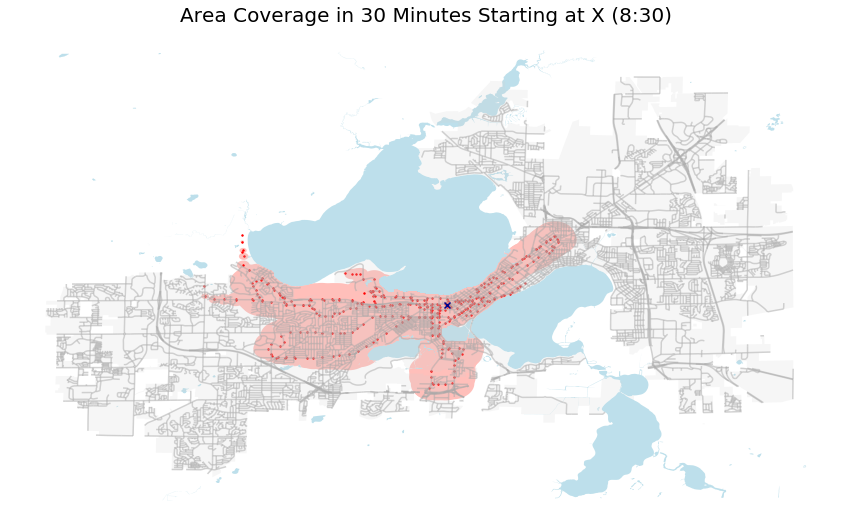

In [70]:
#PEAK at 8:30
fig, ax = plt.subplots(figsize=(15,15))
DATA_PATH = "../data"
DAY = "monday"
START_STOP = 765
START_TIME = "8:30:00"
ELAPSE_TIME = "00:30:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 10

plot(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN, ax)
ax.set_title("Area Coverage in 30 Minutes Starting at X (8:30)", size=20)
fig.savefig("Area_8:30", dpi=200)

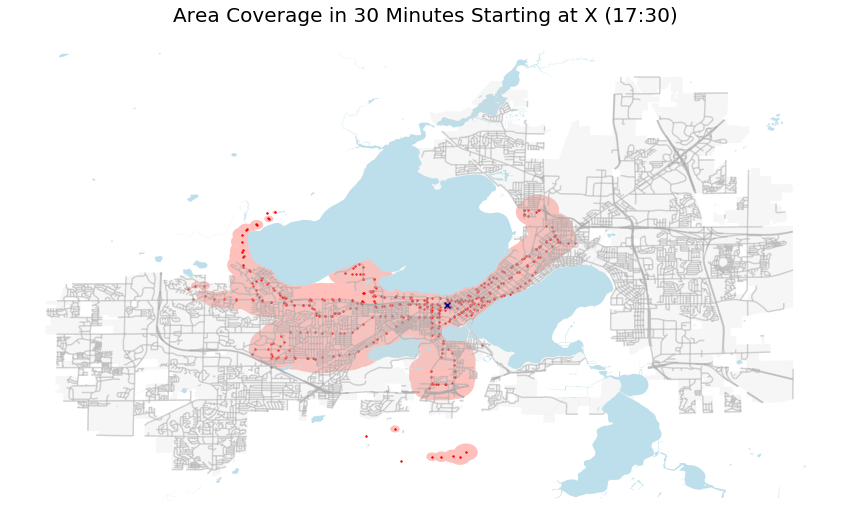

In [71]:
#PEAK AT 17:30 
fig, ax = plt.subplots(figsize=(15,15))
DATA_PATH = "../data"
DAY = "monday"
START_STOP = 765
START_TIME = "17:30:00"
ELAPSE_TIME = "00:32:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 10

plot(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN, ax=ax)
ax.set_title("Area Coverage in 30 Minutes Starting at X (17:30)", size=20)
fig.savefig("Area_17:30", dpi=200)

Text(0.5, 1, 'Area Coverage in 30 Minutes Starting at X (6:00)')

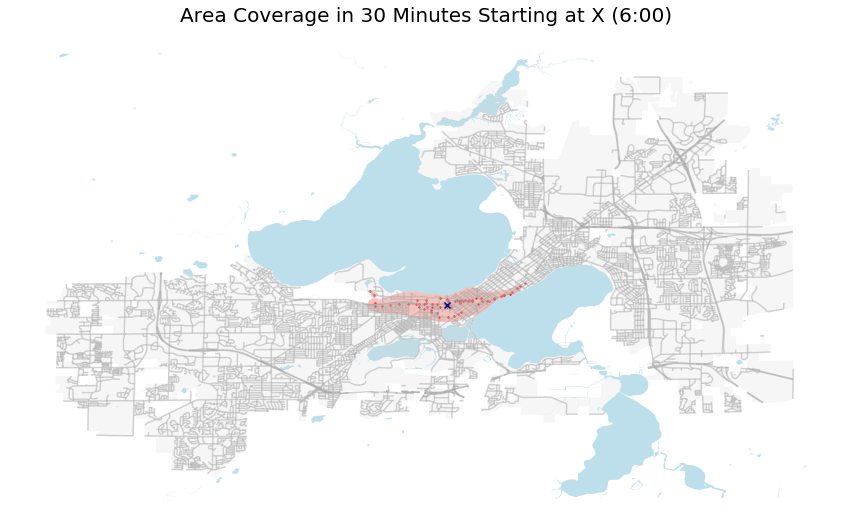

In [72]:
# LOW AT 6:00
fig, ax = plt.subplots(figsize=(15,15))
DATA_PATH = "../data"
DAY = "monday"
START_STOP = 765
START_TIME = "06:00:00"
ELAPSE_TIME = "00:30:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 10

plot(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN, ax=ax)
ax.set_title("Area Coverage in 30 Minutes Starting at X (6:00)", size=20)

Text(0.5, 1, 'Area Coverage in 30 Minutes Starting at X (12:00)')

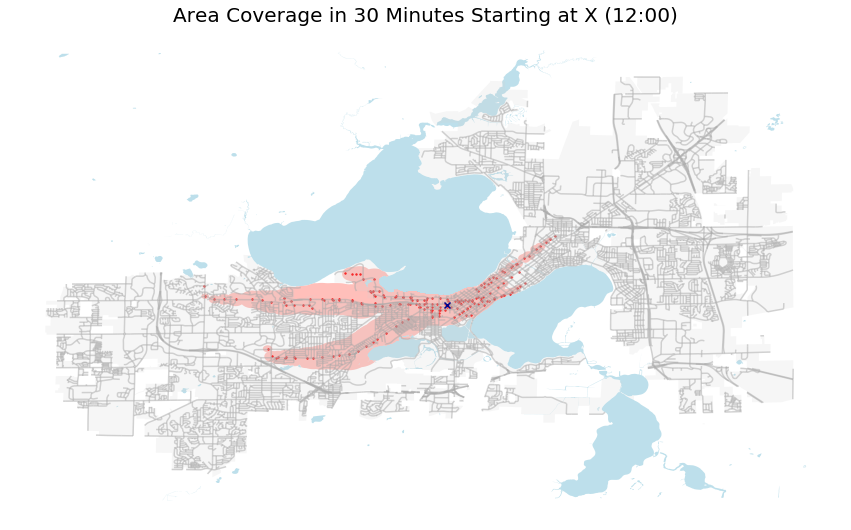

In [73]:
fig, ax = plt.subplots(figsize=(15,15))
DATA_PATH = "../data"
DAY = "monday"
START_STOP = 765
START_TIME = "12:00:00"
ELAPSE_TIME = "00:30:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 10

plot(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN, ax=ax)
ax.set_title("Area Coverage in 30 Minutes Starting at X (12:00)", size=20)

Text(0.5, 1, 'Area Coverage in 30 Minutes Starting at X (12:00)')

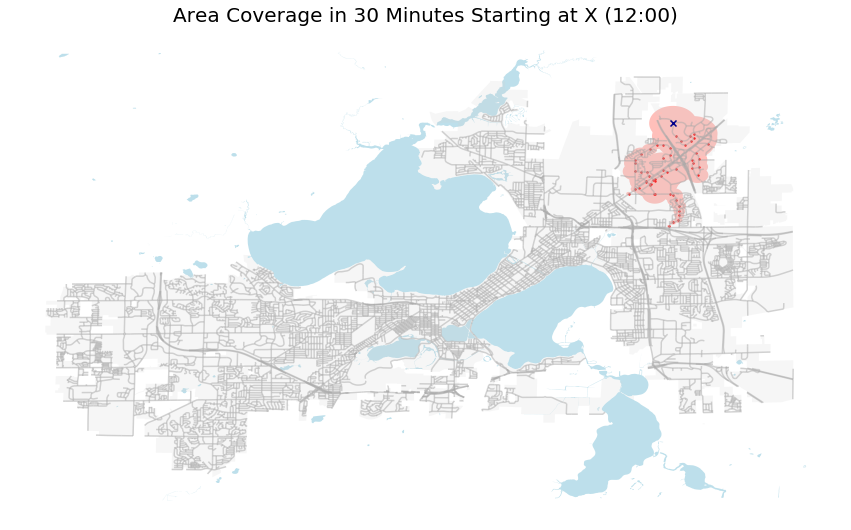

In [74]:
# LOW Farthest distance travelled starting pt:
#STOP = 8519, 8486
fig, ax = plt.subplots(figsize=(15,15))
DATA_PATH = "../data"
DAY = "monday"
START_STOP = 9486
START_TIME = "12:00:00"
ELAPSE_TIME = "00:30:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 10

plot(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN, ax=ax)
ax.set_title("Area Coverage in 30 Minutes Starting at X (12:00)", size=20)

Text(0.5, 1, 'Area Coverage in 30 Minutes Starting at X')

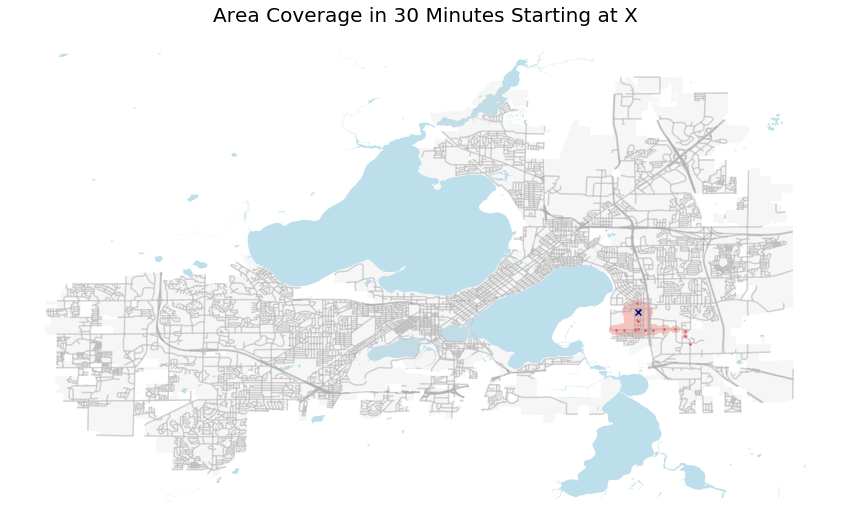

In [51]:
# FROM MEGANS PRESENTATION
#LOW DISTANCE TRAVELLED WITH 0 TRANSFERS
fig, ax = plt.subplots(figsize=(15,15))
DATA_PATH = "../data"
DAY = "monday"
START_STOP = 7348
START_TIME = "12:00:00"
ELAPSE_TIME = "00:30:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 10

plot(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN, ax=ax)
ax.set_title("Area Coverage in 30 Minutes Starting at X", size=20)

Text(0.5, 1, 'Area Coverage in 30 Minutes Starting at X (12:00)')

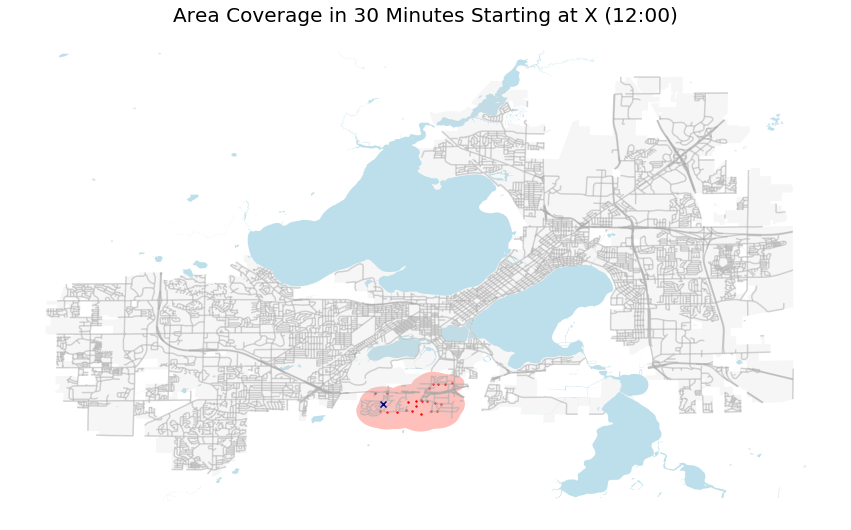

In [75]:
# FROM MEGANS PRESENTATION
#LOW DISTANCE TRAVELLED WITH 0 TRANSFERS
fig, ax = plt.subplots(figsize=(15,15))
DATA_PATH = "../data"
DAY = "monday"
START_STOP = 4572
START_TIME = "12:00:00"
ELAPSE_TIME = "00:30:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 10

plot(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN, ax=ax)
ax.set_title("Area Coverage in 30 Minutes Starting at X (12:00)", size=20)

Text(0.5, 1, 'Area Coverage in 30 Minutes Starting at X (12:00)')

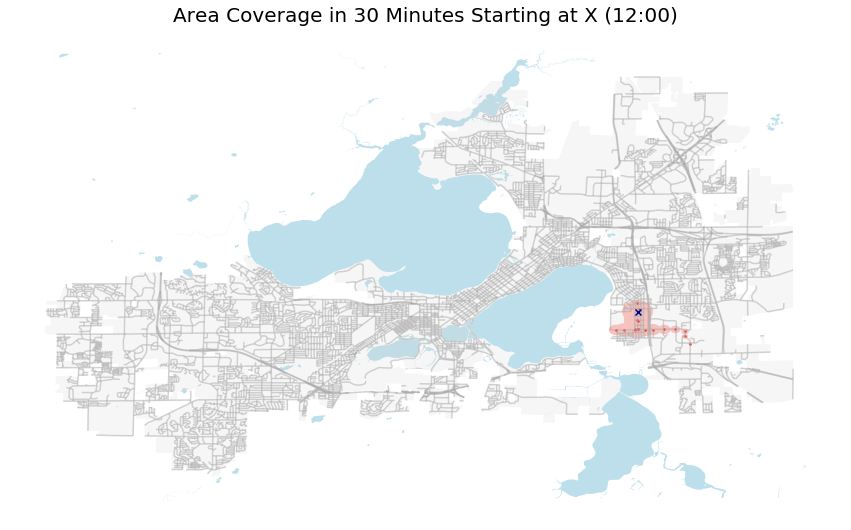

In [76]:
# LOW Farthest distance travelled starting pt:
#STOP = 8519, 8486
fig, ax = plt.subplots(figsize=(15,15))
DATA_PATH = "../data"
DAY = "monday"
START_STOP = 7348
START_TIME = "12:00:00"
ELAPSE_TIME = "00:30:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 10

plot(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN, ax=ax)
ax.set_title("Area Coverage in 30 Minutes Starting at X (12:00)", size=20)

AttributeError: 'NoneType' object has no attribute 'walking_distance'

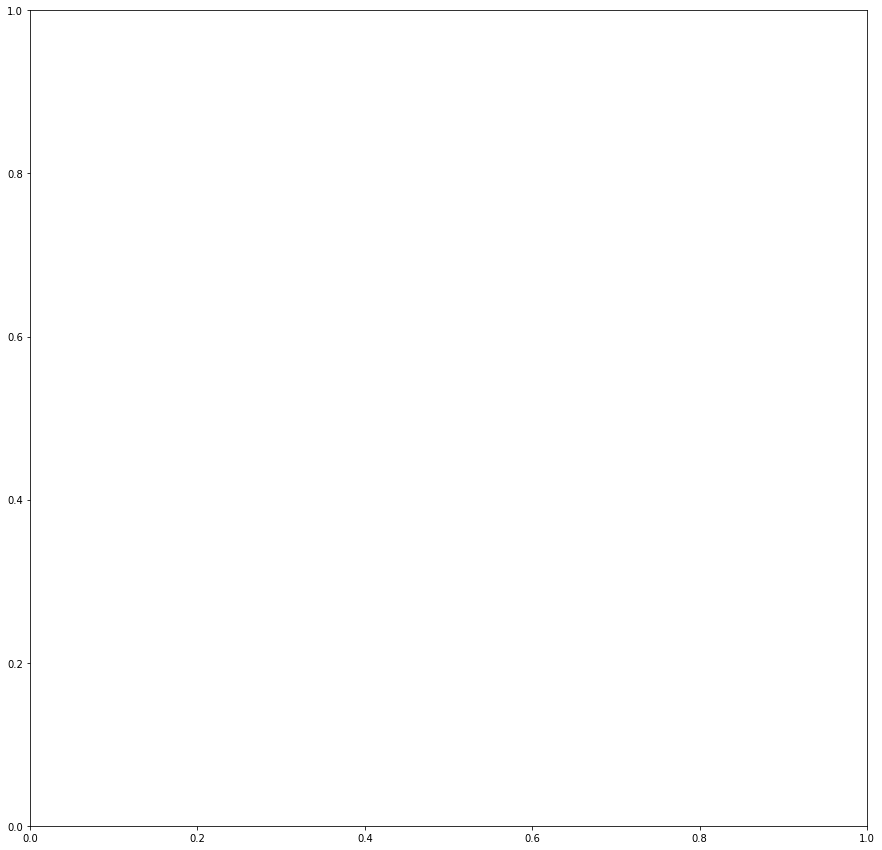

In [67]:
# LOW Farthest distance travelled starting pt:
#STOP = 8519, 8486
fig, ax = plt.subplots(figsize=(15,15))
DATA_PATH = "../data"
DAY = "monday"
# START_STOP = 8281
START_STOP = 8461

START_TIME = "12:00:00"
ELAPSE_TIME = "00:30:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 10

plot(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN, ax=ax)
ax.set_title("Area Coverage in 30 Minutes Starting at X", size=20)

In [ ]:
#TODO Make Animation 
DATA_PATH = "../data"
DAY = "monday"
START_STOP = 765
START_TIME = "17:30:00"
ELAPSE_TIME = "00:02:00"
AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
MAX_WALKING_MIN = 10

plot(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN)

In [ ]:
fig, ax = plt.subplots()

def draw_frame(frame_num):
    ax.clear()
    DATA_PATH = "../data"
    DAY = "monday"
    START_STOP = 765
    START_TIME = "17:30:00"
    ELAPSE_TIME = None
    AVG_WALKING_SPEED = 1.4 # 1.4 meters per second
    MAX_WALKING_MIN = 10
    if frame_num < 10:
        ElAPSE_TIME = "00:0" + str(frame_num) + ":00"
    else:
        ELAPSE_TIME = "00:" + str(frame_num) + ":00"
    
    plot(DATA_PATH, DAY, START_TIME, ELAPSE_TIME, AVG_WALKING_SPEED, MAX_WALKING_MIN, ax)
anim = FuncAnimation(fig, draw_frame, 10)  
html = anim.to_html5_video()
HTML(html)
    
